# Machine Learning Practice Case

### Importing library

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv('ML_2_Fellow.csv', encoding = "ISO-8859-1")

In [3]:
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


### Getting null values

In [5]:
df.isna().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

There are a lot of missing values, but the columns seem to be identical.

In [6]:
df_na = df[df['Kode_Barang'].isna()]
df_na

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


There seems to be an error occured when importing the data. We will input the values manually

### Put error data into separated table

In [7]:
df_na_fix = pd.DataFrame()

In [8]:
df_na_fix['Kode_Bayar'] = df_na['Kode_Bayar'].str.split(',').str[0]
df_na_fix['Kode_Barang'] = df_na['Kode_Bayar'].str.split(',').str[1]
df_na_fix['Barang'] = df_na['Kode_Bayar'].str.split('"').str[1]
df_na_fix['Jumlah'] = df_na['Kode_Bayar'].str.split(',').str[-5]
df_na_fix['Tanggal_Transaksi'] = df_na['Kode_Bayar'].str.split(',').str[-4]
df_na_fix['Harga_Satuan'] = df_na['Kode_Bayar'].str.split(',').str[-3]
df_na_fix['Kode_Pelanggan'] = df_na['Kode_Bayar'].str.split(',').str[-2]
df_na_fix['Negara'] = df_na['Kode_Bayar'].str.split(',').str[-1]

In [9]:
df_na_fix

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,"FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
871,536477,22041,RECORD FRAME 7,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,536520,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,RECORD FRAME 7,2,12/9/2011 10:26,5.79,,United Kingdom
541549,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,CHARLIE+LOLA,1,12/9/2011 11:34,0.39,14446,United Kingdom


### Delete null values from original table

In [10]:
df.drop(df[df['Kode_Barang'].isna()].index, inplace = True)

### Append fixed error values to the previous table

In [11]:
df = df.append(df_na_fix)

In [12]:
df.isna().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                 1454
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       132692
Negara                    0
dtype: int64

In [13]:
df.dtypes

Kode_Bayar           object
Kode_Barang          object
Barang               object
Jumlah               object
Tanggal_Transaksi    object
Harga_Satuan         object
Kode_Pelanggan       object
Negara               object
dtype: object

### Convert numeric values to float

In [14]:
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].replace(r'^\s*$', np.nan, regex=True)

In [15]:
df['Jumlah'] = df['Jumlah'].astype(float)
df['Harga_Satuan'] = df['Harga_Satuan'].astype(float)
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].astype(float)

### Match Value of Kode Barang and Barang Columns

Look for entities that have Kode_Barang values but null Barang values

In [16]:
df[['Kode_Barang', 'Barang']].loc[df['Kode_Barang'].notnull() & df['Barang'].isna()]

,Kode_Barang,Barang
622,22139,NaN
1970,21134,NaN
1971,22145,NaN
1972,37509,NaN
1987,85226A,NaN
...,...,...
535322,84581,NaN
535326,23406,NaN
535332,21620,NaN
536981,72817,NaN


In [17]:
# fill the Kode_Barang value to check whether all 'barang' with the same 'kode_barang' has the same value 
df[['Kode_Barang', 'Barang']].loc[df['Kode_Barang'] == '22139']

,Kode_Barang,Barang
106,22139,RETROSPOT TEA SET CERAMIC 11 PC
622,22139,NaN
6392,22139,amazon
6885,22139,RETROSPOT TEA SET CERAMIC 11 PC
7203,22139,NaN
...,...,...
538411,22139,RETROSPOT TEA SET CERAMIC 11 PC
539531,22139,RETROSPOT TEA SET CERAMIC 11 PC
540441,22139,RETROSPOT TEA SET CERAMIC 11 PC
541387,22139,RETROSPOT TEA SET CERAMIC 11 PC


### Fill empty 'Barang' rows by matching 'Kode_Barang' in other rows

In [18]:
df['Barang'] = df['Barang'].fillna(df.groupby('Kode_Barang')['Barang'].transform('first'))

In [19]:
# recheck null values
df[['Kode_Barang', 'Barang']].loc[df['Kode_Barang'].notnull() & df['Barang'].isna()]

,Kode_Barang,Barang
1970,21134,NaN
1987,85226A,NaN
1988,85044,NaN
2024,20950,NaN
2026,84670,NaN
...,...,...
280754,21610,NaN
281615,37477B,NaN
281616,37477C,NaN
346849,35592T,NaN


In [20]:
# drop rows when 'kode_barang' has no 'barang' value
df.drop(df[df['Kode_Barang'].notnull() & df['Barang'].isna()].index, inplace = True)

In [21]:
# recheck null values
df[['Kode_Barang', 'Barang']].loc[df['Kode_Barang'].notnull() & df['Barang'].isna()]

,Kode_Barang,Barang


### Drop rows with null 'kode_barang' values

In [22]:
df.drop(df[df['Kode_Barang'].isna() & df['Barang'].isna()].index, inplace = True)

In [23]:
df.isna().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                    0
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       134968
Negara                    0
dtype: int64

### View 'Negara' List

In [24]:
df['Negara'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [25]:
# drop unspecified country
df.drop(df[df['Negara'] == 'Unspecified'].index, inplace = True)

### Match Value of 'tanggal' or 'kode_bayar' with 'kode_pelanggan'

In [26]:
df[['Kode_Bayar', 'Tanggal_Transaksi', 'Kode_Pelanggan']].loc[df['Kode_Pelanggan'].isna()]

,Kode_Bayar,Tanggal_Transaksi,Kode_Pelanggan
622,536414,12/1/2010 11:52,NaN
1443,536544,12/1/2010 14:32,NaN
1444,536544,12/1/2010 14:32,NaN
1445,536544,12/1/2010 14:32,NaN
1446,536544,12/1/2010 14:32,NaN
...,...,...,...
540682,581492,12/9/2011 10:03,NaN
540774,581492,12/9/2011 10:03,NaN
541021,581492,12/9/2011 10:03,NaN
541343,581498,12/9/2011 10:26,NaN


In [27]:
# matching values overview, change 'kode_bayar' field with desired value
df.loc[df['Kode_Bayar'].str.contains("536544")]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1.0,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2.0,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4.0,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2.0,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9.0,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1811,536544,90214H,LETTER,1.0,12/1/2010 14:32,0.85,NaN,United Kingdom
1812,536544,90214J,LETTER,1.0,12/1/2010 14:32,0.85,NaN,United Kingdom
1813,536544,90214R,LETTER,1.0,12/1/2010 14:32,0.85,NaN,United Kingdom
1922,536544,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",1.0,12/1/2010 14:32,11.02,NaN,United Kingdom


In [28]:
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].fillna(df.groupby(['Tanggal_Transaksi', 'Kode_Bayar'])['Kode_Pelanggan'].transform('first'))


In [29]:
# rechecking whether kode_pelanggan was filled or not
df[['Kode_Bayar', 'Tanggal_Transaksi', 'Kode_Pelanggan']].loc[df['Kode_Pelanggan'].isna()]

,Kode_Bayar,Tanggal_Transaksi,Kode_Pelanggan
622,536414,12/1/2010 11:52,NaN
1443,536544,12/1/2010 14:32,NaN
1444,536544,12/1/2010 14:32,NaN
1445,536544,12/1/2010 14:32,NaN
1446,536544,12/1/2010 14:32,NaN
...,...,...,...
540682,581492,12/9/2011 10:03,NaN
540774,581492,12/9/2011 10:03,NaN
541021,581492,12/9/2011 10:03,NaN
541343,581498,12/9/2011 10:26,NaN


It appears that there is no empty 'kode_pelanggan' that has an initial value for the same 'tanggal_transaksi' and 'kode_bayar'. However, those rows will not be deleted at first for getting item's statistics.  Instead, we will set the NaN value of Kode_Pelanggan to 0

In [30]:
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].fillna(0)

In [31]:
df.isna().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

### Dropping 'Barang' with non uppercase character

In [32]:
df = df[df['Barang'].str.isupper().fillna(False) & df['Barang'].str.contains(" ")].reset_index(drop=True)

In [33]:
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536660,581498,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",2.0,12/9/2011 10:26,10.79,0.0,United Kingdom
536661,581498,22041,RECORD FRAME 7,2.0,12/9/2011 10:26,5.79,0.0,United Kingdom
536662,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12.0,12/9/2011 10:46,3.95,12985.0,United Kingdom
536663,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24.0,12/9/2011 11:26,1.25,14422.0,United Kingdom


### Sort rows by 'jumlah'

In [34]:
df.sort_values(by='Jumlah', ascending=False)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
536645,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0,12/9/2011 9:15,2.08,16446.0,United Kingdom
60257,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,1/18/2011 10:01,1.04,12346.0,United Kingdom
491646,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540.0,11/25/2011 15:57,0.00,13256.0,United Kingdom
72941,542504,37413,ICON MUG REVOLUTIONARY,5568.0,1/28/2011 12:03,0.00,0.0,United Kingdom
412595,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0,10/27/2011 12:26,0.21,12901.0,United Kingdom
...,...,...,...,...,...,...,...,...
316143,565304,16259,PIECE OF CAMO STATIONERY SET,-3167.0,9/2/2011 12:18,0.00,0.0,United Kingdom
333967,566768,16045,POPART WOODEN PENCILS ASST,-3667.0,9/14/2011 17:53,0.00,0.0,United Kingdom
4191,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.0,12/2/2010 14:23,0.03,15838.0,United Kingdom
60262,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215.0,1/18/2011 10:17,1.04,12346.0,United Kingdom


### Identifying entities with negative value of 'Jumlah'


As we can see from the previous table, there are some transactions that show negative values in 'Jumlah'. We are going to determine whether such entities should be removed or not from the dataset.

In [92]:
df.loc[df['Jumlah'] < 0].sort_values(by='Jumlah', ascending=True)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215.0,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600.0,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600.0,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360.0,12/2/2010 14:23,0.03,15838.0,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058.0,6/14/2011 10:36,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
242085,C558313,22629,SPACEBOY LUNCH BOX,-1.0,6/28/2011 11:31,1.95,13870.0,United Kingdom
242083,C558312,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,6/28/2011 11:30,2.95,12955.0,United Kingdom
241873,C558255,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,6/27/2011 17:06,2.95,12955.0,United Kingdom
246910,C558745,21844,RED RETROSPOT MUG,-1.0,7/1/2011 17:02,2.95,14415.0,United Kingdom


By looking at the data above, we assume that negative values in 'jumlah' indicates returned, canceled or refunded item or transanction that costs the store.

In [54]:
transac_fail = pd.DataFrame(df.loc[df['Jumlah'] < 0])

In [55]:
transac_fail

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
151,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
232,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
233,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
234,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
235,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
535810,C574026,51014C,"FEATHER PEN,COAL BLACK",-1.0,11/2/2011 12:26,0.39,14606.0,United Kingdom
536411,C579903,85159B,"WHITE TEA,COFFEE,SUGAR JARS",-7.0,12/1/2011 8:41,1.95,18130.0,United Kingdom
536541,C580912,22041,RECORD FRAME 7,-24.0,12/6/2011 13:37,2.55,12989.0,United Kingdom
536640,C581466,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",-1.0,12/8/2011 19:20,4.95,13883.0,United Kingdom


In [56]:
df.drop(df[df['Jumlah'] < 0].index, inplace = True)

## 1.	What items customers buy the most and are there any items we should ignore?

### Creating separate table

In [57]:
item_transac = df[['Kode_Barang', 'Barang', 'Jumlah', 'Harga_Satuan']]

In [58]:
item_transac

,Kode_Barang,Barang,Jumlah,Harga_Satuan
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55
1,71053,WHITE METAL LANTERN,6.0,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39
...,...,...,...,...
536660,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",2.0,10.79
536661,22041,RECORD FRAME 7,2.0,5.79
536662,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12.0,3.95
536663,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24.0,1.25


### Getting sum of items sold per item

In [59]:
item_sum = item_transac.groupby(['Kode_Barang', 'Barang'])[['Jumlah']].agg(sum).reset_index()

In [60]:
item_sum

,Kode_Barang,Barang,Jumlah
0,10002,INFLATABLE POLITICAL GLOBE,1040.0
1,10080,GROOVY CACTUS INFLATABLE,473.0
2,10120,DOGGY RUBBER,193.0
3,10123C,HEARTS WRAPPING TAPE,5.0
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16.0
...,...,...,...
4120,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,3.0
4121,DCGSSBOY,BOYS PARTY BAG,47.0
4122,DCGSSGIRL,GIRLS PARTY BAG,47.0
4123,DOT,DOTCOM POSTAGE,1708.0


### Getting price of each items

In [61]:
item_price = item_transac.groupby(['Kode_Barang', 'Barang'], as_index=False).last()
item_price

,Kode_Barang,Barang,Jumlah,Harga_Satuan
0,10002,INFLATABLE POLITICAL GLOBE,1.0,0.850
1,10080,GROOVY CACTUS INFLATABLE,26.0,0.390
2,10120,DOGGY RUBBER,6.0,0.210
3,10123C,HEARTS WRAPPING TAPE,1.0,0.650
4,10124A,SPOTS ON RED BOOKCOVER TAPE,4.0,0.420
...,...,...,...,...
4120,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2.0,16.130
4121,DCGSSBOY,BOYS PARTY BAG,1.0,3.290
4122,DCGSSGIRL,GIRLS PARTY BAG,1.0,3.290
4123,DOT,DOTCOM POSTAGE,1.0,1714.170


### Getting number of transactions per item

In [62]:
item_count = item_transac.groupby(['Kode_Barang', 'Barang'])[['Jumlah']].agg('count').reset_index()

In [63]:
item_count.rename({'Jumlah': 'Jml_Transaksi'}, axis=1, inplace=True)

In [64]:
item_count

,Kode_Barang,Barang,Jml_Transaksi
0,10002,INFLATABLE POLITICAL GLOBE,72
1,10080,GROOVY CACTUS INFLATABLE,23
2,10120,DOGGY RUBBER,30
3,10123C,HEARTS WRAPPING TAPE,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5
...,...,...,...
4120,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2
4121,DCGSSBOY,BOYS PARTY BAG,11
4122,DCGSSGIRL,GIRLS PARTY BAG,13
4123,DOT,DOTCOM POSTAGE,709


### Combine sum, count, and total price

In [65]:
item_stat = pd.concat([item_sum, item_count['Jml_Transaksi'], item_price['Harga_Satuan']], axis=1)

In [66]:
item_stat['Total_Penjualan'] = item_stat['Jumlah'] * item_stat['Harga_Satuan'] 

In [67]:
item_stat

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
0,10002,INFLATABLE POLITICAL GLOBE,1040.0,72,0.850,884.000
1,10080,GROOVY CACTUS INFLATABLE,473.0,23,0.390,184.470
2,10120,DOGGY RUBBER,193.0,30,0.210,40.530
3,10123C,HEARTS WRAPPING TAPE,5.0,3,0.650,3.250
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16.0,5,0.420,6.720
...,...,...,...,...,...,...
4120,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,3.0,2,16.130,48.390
4121,DCGSSBOY,BOYS PARTY BAG,47.0,11,3.290,154.630
4122,DCGSSGIRL,GIRLS PARTY BAG,47.0,13,3.290,154.630
4123,DOT,DOTCOM POSTAGE,1708.0,709,1714.170,2927802.360


### Data Description

In [68]:
item_stat['Jumlah'].describe()

count     4125.000000
mean      1354.874182
std       3431.401450
min          1.000000
25%         52.000000
50%        334.000000
75%       1334.000000
max      80995.000000
Name: Jumlah, dtype: float64

In [69]:
item_stat['Jml_Transaksi'].describe()

count    4125.000000
mean      127.804848
std       191.102124
min         1.000000
25%        14.000000
50%        59.000000
75%       161.000000
max      2260.000000
Name: Jml_Transaksi, dtype: float64

In [70]:
item_stat['Total_Penjualan'].describe()

count    4.125000e+03
mean     4.258249e+03
std      4.686478e+04
min      0.000000e+00
25%      9.101000e+01
50%      6.230000e+02
75%      2.805230e+03
max      2.927802e+06
Name: Total_Penjualan, dtype: float64

### Items with highest number of sales

In [128]:
top_sales = item_stat.sort_values(by='Jumlah', ascending=False).head(10)
top_sales

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
2651,23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0,1,2.08,168469.60
2108,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033.0,250,2.46,191961.18
3106,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951.0,535,0.63,34619.13
3595,85099B,JUMBO BAG RED RETROSPOT,48478.0,2115,4.13,200214.14
3616,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603.0,2260,2.95,110928.85
1117,22197,POPCORN HOLDER,36758.0,828,0.85,31244.30
3393,84879,ASSORTED COLOUR BIRD ORNAMENT,36439.0,1486,1.69,61581.91
442,21212,PACK OF 72 RETROSPOT CAKE CASES,36382.0,1368,2.08,75674.56
2014,23084,RABBIT NIGHT LIGHT,31591.0,1042,2.08,65709.28
1393,22492,MINI PAINT SET VINTAGE,26633.0,380,0.65,17311.45


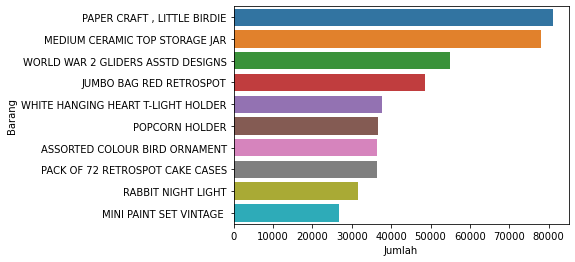

In [132]:
ax = sns.barplot(x="Jumlah", y="Barang", data=top_sales)

### Items with lowest number of sales

In [73]:
item_stat.sort_values(by='Jumlah', ascending=True).head(10)

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
402,21160,KEEP OUT GIRLS DOOR HANGER,1.0,1,3.36,3.36
3204,84550,CROCHET LILAC/RED BEAR KEYRING,1.0,1,1.65,1.65
3218,84569C,PACK 4 FLOWER/BUTTERFLY PATCHES,1.0,1,1.25,1.25
2633,23643,SET 10 CARDS CHRISTMAS BAUBLE 16954,1.0,1,3.33,3.33
3238,84596l,BISCUITS SMALL BOWL LIGHT BLUE,1.0,1,2.46,2.46
3245,84613C,BLUE NEW BAROQUE FLOCK CANDLESTICK,1.0,1,4.65,4.65
4040,90187A,BLUE DROP EARRINGS W BEAD CLUSTER,1.0,1,3.32,3.32
3923,90126A,PINK BERTIE MOBILE PHONE CHARM,1.0,1,3.36,3.36
2621,23628,SET 10 CARDS TRIANGLE ICONS 17220,1.0,1,2.91,2.91
3268,84661a,WHITE SQUARE TABLE CLOCK,1.0,1,4.96,4.96


### Items that give highest income

In [74]:
item_stat[item_stat['Total_Penjualan'] > 0].sort_values(by='Total_Penjualan', ascending=False).head(10)

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
4123,DOT,DOTCOM POSTAGE,1708.0,709,1714.17,2927802.36
1328,22423,REGENCY CAKESTAND 3 TIER,13888.0,2017,24.96,346644.48
3595,85099B,JUMBO BAG RED RETROSPOT,48478.0,2115,4.13,200214.14
2855,47566,PARTY BUNTING,18299.0,1707,10.79,197446.21
2108,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033.0,250,2.46,191961.18
2651,23843,"PAPER CRAFT , LITTLE BIRDIE",80995.0,1,2.08,168469.60
3616,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603.0,2260,2.95,110928.85
2159,23206,LUNCH BAG APPLE DESIGN,12183.0,1071,8.33,101484.39
3063,82484,WOOD BLACK BOARD ANT WHITE FINISH,6020.0,687,16.63,100112.60
2254,23284,DOORMAT KEEP CALM AND COME IN,5503.0,737,15.79,86892.37


### Items that give lowest income

In [75]:
item_stat[item_stat['Total_Penjualan'] > 0].sort_values(by='Total_Penjualan', ascending=True).head(10)

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
4124,PADS,PADS TO MATCH ALL CUSHIONS,4.0,4,0.001,0.004
2342,23366,SET 12 COLOURING PENCILS DOILEY,1.0,1,0.650,0.650
3300,84731,3 BIRDS CANVAS SCREEN,2.0,2,0.390,0.780
2899,51014c,"FEATHER PEN,COAL BLACK",1.0,1,0.830,0.830
481,21268,VINTAGE BLUE TINSEL REEL,2.0,1,0.420,0.840
3113,84201C,HAPPY BIRTHDAY CARD TEDDY/CAKE,5.0,1,0.190,0.950
3115,84206B,CAT WITH SUNGLASSES BLANK CARD,5.0,1,0.190,0.950
2668,35597B,BLACKCHRISTMAS TREE 30CM,1.0,1,1.250,1.250
2348,23370,SET 36 COLOURING PENCILS DOILEY,1.0,1,1.250,1.250
3304,84743C,ORANGE FELT VASE + FLOWERS,1.0,1,1.250,1.250


### Items with largest number of transaction

In [133]:
top_transac = item_stat.sort_values(by='Jml_Transaksi', ascending=False).head(10)
top_transac

,Kode_Barang,Barang,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
3616,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603.0,2260,2.95,110928.85
3595,85099B,JUMBO BAG RED RETROSPOT,48478.0,2115,4.13,200214.14
1328,22423,REGENCY CAKESTAND 3 TIER,13888.0,2017,24.96,346644.48
2855,47566,PARTY BUNTING,18299.0,1707,10.79,197446.21
176,20725,LUNCH BAG RED RETROSPOT,19336.0,1592,1.45,28037.20
3393,84879,ASSORTED COLOUR BIRD ORNAMENT,36439.0,1486,1.69,61581.91
1617,22720,SET OF 3 CAKE TINS PANTRY DESIGN,7507.0,1401,10.79,81000.53
442,21212,PACK OF 72 RETROSPOT CAKE CASES,36382.0,1368,2.08,75674.56
179,20727,LUNCH BAG BLACK SKULL.,12232.0,1327,1.65,20182.80
1361,22457,NATURAL SLATE HEART CHALKBOARD,9172.0,1263,5.79,53105.88


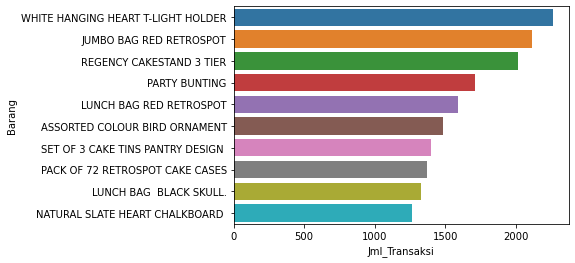

In [134]:
ax = sns.barplot(x="Jml_Transaksi", y="Barang", data=top_transac)

## 2.	What is our strategy to increase sales based on our export destination countries?

### Creating Country Stats

In [218]:
country_transac = df[['Kode_Barang', 'Barang', 'Jumlah', 'Harga_Satuan', 'Negara']]

### Items Sold per Country

In [219]:
item_sum_ctr = country_transac.groupby(['Kode_Barang', 'Barang', 'Negara'])[['Jumlah']].agg(sum).reset_index()

In [220]:
item_sum_ctr

,Kode_Barang,Barang,Negara,Jumlah
0,10002,INFLATABLE POLITICAL GLOBE,EIRE,12.0
1,10002,INFLATABLE POLITICAL GLOBE,France,372.0
2,10002,INFLATABLE POLITICAL GLOBE,Germany,1.0
3,10002,INFLATABLE POLITICAL GLOBE,Japan,1.0
4,10002,INFLATABLE POLITICAL GLOBE,Spain,24.0
...,...,...,...,...
19627,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,United Kingdom,3.0
19628,DCGSSBOY,BOYS PARTY BAG,United Kingdom,47.0
19629,DCGSSGIRL,GIRLS PARTY BAG,United Kingdom,47.0
19630,DOT,DOTCOM POSTAGE,United Kingdom,1708.0


### Item Price

In [221]:
item_price_ctr = country_transac.groupby(['Kode_Barang', 'Barang', 'Negara'], as_index=False).last()
item_price_ctr

,Kode_Barang,Barang,Negara,Jumlah,Harga_Satuan
0,10002,INFLATABLE POLITICAL GLOBE,EIRE,12.0,0.850
1,10002,INFLATABLE POLITICAL GLOBE,France,120.0,0.850
2,10002,INFLATABLE POLITICAL GLOBE,Germany,1.0,0.850
3,10002,INFLATABLE POLITICAL GLOBE,Japan,1.0,0.850
4,10002,INFLATABLE POLITICAL GLOBE,Spain,24.0,0.850
...,...,...,...,...,...
19627,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,United Kingdom,2.0,16.130
19628,DCGSSBOY,BOYS PARTY BAG,United Kingdom,1.0,3.290
19629,DCGSSGIRL,GIRLS PARTY BAG,United Kingdom,1.0,3.290
19630,DOT,DOTCOM POSTAGE,United Kingdom,1.0,1714.170


### Item Transaction per Country

In [222]:
item_count_ctr = country_transac.groupby(['Kode_Barang', 'Barang', 'Negara'])[['Jumlah']].agg('count').reset_index()
item_count_ctr.rename({'Jumlah': 'Jml_Transaksi'}, axis=1, inplace=True)
item_count_ctr

,Kode_Barang,Barang,Negara,Jml_Transaksi
0,10002,INFLATABLE POLITICAL GLOBE,EIRE,1
1,10002,INFLATABLE POLITICAL GLOBE,France,8
2,10002,INFLATABLE POLITICAL GLOBE,Germany,1
3,10002,INFLATABLE POLITICAL GLOBE,Japan,1
4,10002,INFLATABLE POLITICAL GLOBE,Spain,1
...,...,...,...,...
19627,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,United Kingdom,2
19628,DCGSSBOY,BOYS PARTY BAG,United Kingdom,11
19629,DCGSSGIRL,GIRLS PARTY BAG,United Kingdom,13
19630,DOT,DOTCOM POSTAGE,United Kingdom,709


### Combine Sales, Price, and Transaction

In [223]:
item_stat_ctr = pd.concat([item_sum_ctr, item_count_ctr['Jml_Transaksi'], item_price_ctr['Harga_Satuan']], axis=1)

item_stat_ctr['Total_Penjualan'] = item_stat_ctr['Jumlah'] * item_stat_ctr['Harga_Satuan'] 

item_stat_ctr

,Kode_Barang,Barang,Negara,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
0,10002,INFLATABLE POLITICAL GLOBE,EIRE,12.0,1,0.850,10.200
1,10002,INFLATABLE POLITICAL GLOBE,France,372.0,8,0.850,316.200
2,10002,INFLATABLE POLITICAL GLOBE,Germany,1.0,1,0.850,0.850
3,10002,INFLATABLE POLITICAL GLOBE,Japan,1.0,1,0.850,0.850
4,10002,INFLATABLE POLITICAL GLOBE,Spain,24.0,1,0.850,20.400
...,...,...,...,...,...,...,...
19627,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,United Kingdom,3.0,2,16.130,48.390
19628,DCGSSBOY,BOYS PARTY BAG,United Kingdom,47.0,11,3.290,154.630
19629,DCGSSGIRL,GIRLS PARTY BAG,United Kingdom,47.0,13,3.290,154.630
19630,DOT,DOTCOM POSTAGE,United Kingdom,1708.0,709,1714.170,2927802.360


In [224]:
ctr_max_sales = item_stat_ctr[item_stat_ctr.groupby('Negara')['Total_Penjualan'].transform(max) == item_stat_ctr['Total_Penjualan']]
ctr_max_sales

,Kode_Barang,Barang,Negara,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
1077,20967,GREY FLORAL FELTCRAFT SHOULDER BAG,Lithuania,36.0,2,3.75,135.00
2478,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,RSA,3.0,1,12.75,38.25
5443,22139,RETROSPOT TEA SET CERAMIC 11 PC,Portugal,97.0,14,4.95,480.15
6455,22326,ROUND SNACK BOXES SET OF4 WOODLAND,Belgium,420.0,38,2.95,1239.00
6457,22326,ROUND SNACK BOXES SET OF4 WOODLAND,Czech Republic,24.0,1,2.95,70.80
6472,22326,ROUND SNACK BOXES SET OF4 WOODLAND,Switzerland,480.0,17,2.95,1416.00
7211,22423,REGENCY CAKESTAND 3 TIER,Brazil,16.0,1,10.95,175.20
7213,22423,REGENCY CAKESTAND 3 TIER,Channel Islands,44.0,5,12.75,561.00
7215,22423,REGENCY CAKESTAND 3 TIER,EIRE,693.0,73,10.95,7588.35
7218,22423,REGENCY CAKESTAND 3 TIER,Germany,809.0,63,10.95,8858.55


### Creating Country Stats with Failed Transaction

In [77]:
country_transac_fail = transac_fail[['Kode_Barang', 'Barang', 'Jumlah', 'Harga_Satuan', 'Negara']]

### Items Sold per Country

In [78]:
item_sum_ctr_fail = country_transac_fail.groupby(['Kode_Barang', 'Barang', 'Negara'])[['Jumlah']].agg(sum).reset_index()

In [79]:
item_sum_ctr_fail

,Kode_Barang,Barang,Negara,Jumlah
0,10002,INFLATABLE POLITICAL GLOBE,United Kingdom,-3.0
1,10123C,HEARTS WRAPPING TAPE,United Kingdom,-18.0
2,10133,COLOURING PENCILS BROWN TUBE,United Kingdom,-10.0
3,10135,COLOURING PENCILS BROWN TUBE,United Kingdom,-1.0
4,11001,ASSTD DESIGN RACING CAR PEN,United Kingdom,-185.0
...,...,...,...,...
3218,90210C,RED ACRYLIC FACETED BANGLE,United Kingdom,-10.0
3219,90211B,JET BLACK LAS VEGAS NECKLACE 45CM,United Kingdom,-2.0
3220,AMAZONFEE,AMAZON FEE,United Kingdom,-32.0
3221,DCGS0070,CAMOUFLAGE DOG COLLAR,United Kingdom,-8.0


### Item Price

In [80]:
item_price_ctr_fail = country_transac_fail.groupby(['Kode_Barang', 'Barang', 'Negara'], as_index=False).last()
item_price_ctr_fail

,Kode_Barang,Barang,Negara,Jumlah,Harga_Satuan
0,10002,INFLATABLE POLITICAL GLOBE,United Kingdom,-3.0,0.00
1,10123C,HEARTS WRAPPING TAPE,United Kingdom,-18.0,0.00
2,10133,COLOURING PENCILS BROWN TUBE,United Kingdom,-10.0,0.42
3,10135,COLOURING PENCILS BROWN TUBE,United Kingdom,-1.0,1.25
4,11001,ASSTD DESIGN RACING CAR PEN,United Kingdom,-1.0,1.69
...,...,...,...,...,...
3218,90210C,RED ACRYLIC FACETED BANGLE,United Kingdom,-10.0,0.00
3219,90211B,JET BLACK LAS VEGAS NECKLACE 45CM,United Kingdom,-2.0,5.95
3220,AMAZONFEE,AMAZON FEE,United Kingdom,-1.0,17836.46
3221,DCGS0070,CAMOUFLAGE DOG COLLAR,United Kingdom,-8.0,0.00


### Item Transaction per Country

In [81]:
item_count_ctr_fail = country_transac_fail.groupby(['Kode_Barang', 'Barang', 'Negara'])[['Jumlah']].agg('count').reset_index()
item_count_ctr_fail.rename({'Jumlah': 'Jml_Transaksi'}, axis=1, inplace=True)
item_count_ctr_fail

,Kode_Barang,Barang,Negara,Jml_Transaksi
0,10002,INFLATABLE POLITICAL GLOBE,United Kingdom,1
1,10123C,HEARTS WRAPPING TAPE,United Kingdom,1
2,10133,COLOURING PENCILS BROWN TUBE,United Kingdom,1
3,10135,COLOURING PENCILS BROWN TUBE,United Kingdom,1
4,11001,ASSTD DESIGN RACING CAR PEN,United Kingdom,5
...,...,...,...,...
3218,90210C,RED ACRYLIC FACETED BANGLE,United Kingdom,1
3219,90211B,JET BLACK LAS VEGAS NECKLACE 45CM,United Kingdom,1
3220,AMAZONFEE,AMAZON FEE,United Kingdom,32
3221,DCGS0070,CAMOUFLAGE DOG COLLAR,United Kingdom,1


### Combine Sales, Price, and Transaction

In [82]:
item_stat_ctr_fail = pd.concat([item_sum_ctr_fail, item_count_ctr_fail['Jml_Transaksi'], item_price_ctr_fail['Harga_Satuan']], axis=1)

item_stat_ctr_fail['Total_Penjualan'] = item_stat_ctr_fail['Jumlah'] * item_stat_ctr_fail['Harga_Satuan'] 

item_stat_ctr_fail

,Kode_Barang,Barang,Negara,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
0,10002,INFLATABLE POLITICAL GLOBE,United Kingdom,-3.0,1,0.00,-0.00
1,10123C,HEARTS WRAPPING TAPE,United Kingdom,-18.0,1,0.00,-0.00
2,10133,COLOURING PENCILS BROWN TUBE,United Kingdom,-10.0,1,0.42,-4.20
3,10135,COLOURING PENCILS BROWN TUBE,United Kingdom,-1.0,1,1.25,-1.25
4,11001,ASSTD DESIGN RACING CAR PEN,United Kingdom,-185.0,5,1.69,-312.65
...,...,...,...,...,...,...,...
3218,90210C,RED ACRYLIC FACETED BANGLE,United Kingdom,-10.0,1,0.00,-0.00
3219,90211B,JET BLACK LAS VEGAS NECKLACE 45CM,United Kingdom,-2.0,1,5.95,-11.90
3220,AMAZONFEE,AMAZON FEE,United Kingdom,-32.0,32,17836.46,-570766.72
3221,DCGS0070,CAMOUFLAGE DOG COLLAR,United Kingdom,-8.0,1,0.00,-0.00


In [84]:
ctr_max_reject = item_stat_ctr_fail[item_stat_ctr_fail.groupby('Negara')['Total_Penjualan'].transform(min) == item_stat_ctr_fail['Total_Penjualan']]
ctr_max_reject

,Kode_Barang,Barang,Negara,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
14,15056N,EDWARDIAN PARASOL NATURAL,Cyprus,-33.0,1,5.95,-196.35
656,21843,RED RETROSPOT CAKE STAND,Hong Kong,-1.0,1,10.95,-10.95
868,22120,WELCOME WOODEN BLOCK LETTERS,Italy,-9.0,1,9.95,-89.55
912,22169,FAMILY ALBUM WHITE PICTURE FRAME,Channel Islands,-2.0,1,8.50,-17.00
1076,22328,ROUND SNACK BOXES SET OF 4 FRUITS,Japan,-624.0,1,2.55,-1591.20
1106,22357,KINGS CHOICE BISCUIT TIN,Austria,-5.0,1,4.25,-21.25
1114,22361,GLASS JAR DAISY FRESH COTTON WOOL,Saudi Arabia,-5.0,1,2.95,-14.75
1172,22423,REGENCY CAKESTAND 3 TIER,France,-19.0,5,12.75,-242.25
1173,22423,REGENCY CAKESTAND 3 TIER,Germany,-72.0,18,10.95,-788.40
1233,22474,SPACEBOY TV DINNER TRAY,Israel,-32.0,1,4.25,-136.00


In [233]:
ctr_max_failed_top = ctr_max_reject.sort_values(by='Jumlah', ascending=True).head(10)
ctr_max_failed_top

,Kode_Barang,Barang,Negara,Jumlah,Jml_Transaksi,Harga_Satuan,Total_Penjualan
1076,22328,ROUND SNACK BOXES SET OF 4 FRUITS,Japan,-624.0,1,2.55,-1591.20
3138,85232B,SET OF 3 BABUSHKA STACKING TINS,Sweden,-240.0,1,4.95,-1188.00
1807,22956,36 FOIL HEART CAKE CASES,Netherlands,-144.0,1,1.85,-266.40
2121,23199,JUMBO BAG APPLES,Switzerland,-100.0,1,1.79,-179.00
1874,22990,COTTON APRON PANTRY DESIGN,Australia,-100.0,1,4.25,-425.00
1660,22838,3 TIER CAKE TIN RED AND CREAM,EIRE,-96.0,1,12.75,-1224.00
1173,22423,REGENCY CAKESTAND 3 TIER,Germany,-72.0,18,10.95,-788.40
2642,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,Bahrain,-54.0,1,3.81,-205.74
2772,84459A,PINK METAL CHICKEN HEART,Czech Republic,-48.0,2,1.49,-71.52
2038,23158,SET OF 5 LUCKY CAT MAGNETS,USA,-36.0,1,2.08,-74.88


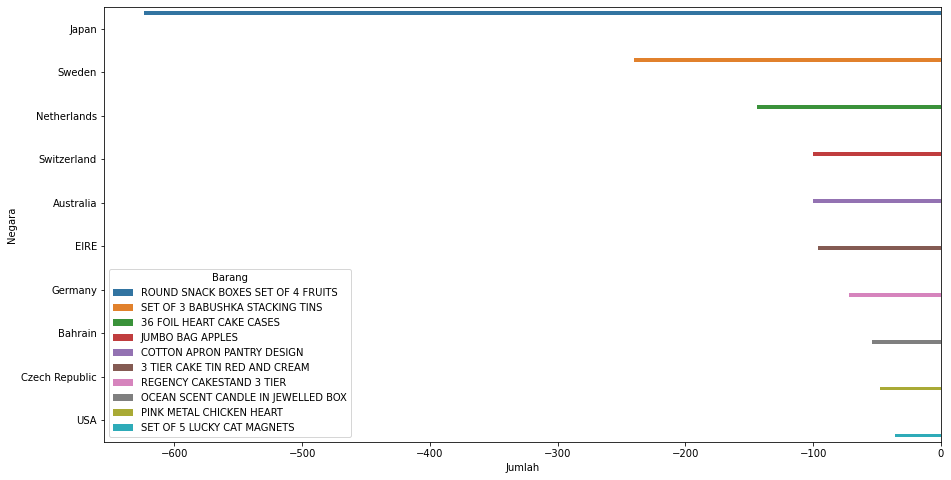

In [238]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Jumlah", y="Negara", hue='Barang', data=ctr_max_failed_top)

## 3. Customer Segmentation

We are going to use **RFM** method to make customer segmentation. RFM will classify customers based on their **(R)ecency, (F)requency, and (M)onetary** value from their purchases.

In [85]:
import numpy as np

### Recency

In [86]:
df['Tanggal_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi'])

#### Get last transaction datetime

In [87]:
max_date = df['Tanggal_Transaksi'].max()
max_date

Timestamp('2011-12-09 12:50:00')

#### Get last transaction date from each customers

In [88]:
recency = df.groupby('Kode_Pelanggan')['Tanggal_Transaksi'].max()

In [89]:
recency.columns = ['Kode Pelanggan', 'Tanggal_Transaksi']

In [90]:
recency = recency.reset_index()

In [91]:
recency.dtypes

Kode_Pelanggan              float64
Tanggal_Transaksi    datetime64[ns]
dtype: object

In [92]:
recency['Recency'] = (max_date - recency['Tanggal_Transaksi'])/np.timedelta64(1, 'D')

In [93]:
recency.drop(columns=['Tanggal_Transaksi'], inplace=True)

In [94]:
recency

,Kode_Pelanggan,Recency
0,0.0,0.100000
1,12346.0,325.117361
2,12347.0,1.873611
3,12348.0,74.984028
4,12349.0,18.124306
...,...,...
4326,18280.0,277.123611
4327,18281.0,180.081250
4328,18282.0,7.046528
4329,18283.0,3.033333


### Frequency

In [95]:
frequency = df.groupby('Kode_Pelanggan')['Kode_Bayar'].count()

In [96]:
frequency.columns = ['Kode Pelanggan', 'Transaksi']

In [97]:
frequency = frequency.reset_index()

In [98]:
frequency

,Kode_Pelanggan,Kode_Bayar
0,0.0,132477
1,12346.0,1
2,12347.0,182
3,12348.0,27
4,12349.0,72
...,...,...
4326,18280.0,10
4327,18281.0,7
4328,18282.0,12
4329,18283.0,754


### Monetary

In [99]:
df['Harga_Total'] = df['Harga_Satuan'] * df['Jumlah']

In [100]:
monetary = df.groupby('Kode_Pelanggan')['Harga_Total'].sum()

In [101]:
monetary.columns = ['Kode Pelanggan', 'Harga_Total']

In [102]:
monetary = monetary.reset_index()

In [103]:
monetary

,Kode_Pelanggan,Harga_Total
0,0.0,1.714938e+06
1,12346.0,7.718360e+04
2,12347.0,4.310000e+03
3,12348.0,1.437240e+03
4,12349.0,1.457550e+03
...,...,...
4326,18280.0,1.806000e+02
4327,18281.0,8.082000e+01
4328,18282.0,1.780500e+02
4329,18283.0,2.088930e+03


### Combine RFM

In [104]:
RFM = pd.concat([recency[['Kode_Pelanggan', 'Recency']], frequency['Kode_Bayar'], monetary['Harga_Total']], axis=1)

In [105]:
RFM

,Kode_Pelanggan,Recency,Kode_Bayar,Harga_Total
0,0.0,0.100000,132477,1.714938e+06
1,12346.0,325.117361,1,7.718360e+04
2,12347.0,1.873611,182,4.310000e+03
3,12348.0,74.984028,27,1.437240e+03
4,12349.0,18.124306,72,1.457550e+03
...,...,...,...,...
4326,18280.0,277.123611,10,1.806000e+02
4327,18281.0,180.081250,7,8.082000e+01
4328,18282.0,7.046528,12,1.780500e+02
4329,18283.0,3.033333,754,2.088930e+03


In [106]:
RFM.rename({'Kode_Bayar': 'Frequency',
           'Harga_Total': 'Monetary'}, axis=1, inplace=True)

In [107]:
RFM.drop(RFM[RFM['Kode_Pelanggan']==0].index, inplace=True)

In [108]:
RFM

,Kode_Pelanggan,Recency,Frequency,Monetary
1,12346.0,325.117361,1,77183.60
2,12347.0,1.873611,182,4310.00
3,12348.0,74.984028,27,1437.24
4,12349.0,18.124306,72,1457.55
5,12350.0,309.867361,16,294.40
...,...,...,...,...
4326,18280.0,277.123611,10,180.60
4327,18281.0,180.081250,7,80.82
4328,18282.0,7.046528,12,178.05
4329,18283.0,3.033333,754,2088.93


### RFM Quantile Values

In [109]:
RFM['R'] = pd.qcut(RFM['Recency'], 4, ['1','2','3','4'])
RFM['F'] = pd.qcut(RFM['Frequency'], 4, ['4','3','2','1'])
RFM['M'] = pd.qcut(RFM['Monetary'], 4, ['4','3','2','1'])

In [110]:
RFM

,Kode_Pelanggan,Recency,Frequency,Monetary,R,F,M
1,12346.0,325.117361,1,77183.60,4,4,1
2,12347.0,1.873611,182,4310.00,1,1,1
3,12348.0,74.984028,27,1437.24,3,3,2
4,12349.0,18.124306,72,1457.55,2,2,2
5,12350.0,309.867361,16,294.40,4,4,4
...,...,...,...,...,...,...,...
4326,18280.0,277.123611,10,180.60,4,4,4
4327,18281.0,180.081250,7,80.82,4,4,4
4328,18282.0,7.046528,12,178.05,1,4,4
4329,18283.0,3.033333,754,2088.93,1,1,1


In [111]:
RFM['RFM_Score'] = RFM.R.astype(str)+ RFM.F.astype(str) + RFM.M.astype(str)
RFM

,Kode_Pelanggan,Recency,Frequency,Monetary,R,F,M,RFM_Score
1,12346.0,325.117361,1,77183.60,4,4,1,441
2,12347.0,1.873611,182,4310.00,1,1,1,111
3,12348.0,74.984028,27,1437.24,3,3,2,332
4,12349.0,18.124306,72,1457.55,2,2,2,222
5,12350.0,309.867361,16,294.40,4,4,4,444
...,...,...,...,...,...,...,...,...
4326,18280.0,277.123611,10,180.60,4,4,4,444
4327,18281.0,180.081250,7,80.82,4,4,4,444
4328,18282.0,7.046528,12,178.05,1,4,4,144
4329,18283.0,3.033333,754,2088.93,1,1,1,111


## Find Number of Clusters for Segmentation

In [112]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [149]:
rfm_km = RFM.iloc[:, 0:4].set_index('Kode_Pelanggan')

In [150]:
rfm_km

,Recency,Frequency,Monetary
Kode_Pelanggan,,,
12346.0,325.117361,1,77183.60
12347.0,1.873611,182,4310.00
12348.0,74.984028,27,1437.24
12349.0,18.124306,72,1457.55
12350.0,309.867361,16,294.40
...,...,...,...
18280.0,277.123611,10,180.60
18281.0,180.081250,7,80.82
18282.0,7.046528,12,178.05


### Looking for number of clusters

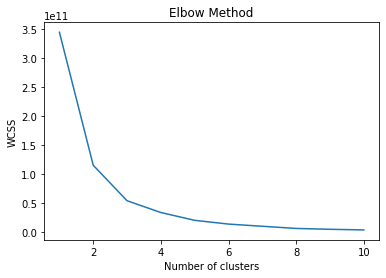

In [151]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_km)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [152]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(rfm_km)
rfm_km['Segment_Group'] = kmeans.labels_

In [175]:
rfm_km

,Recency,Frequency,Monetary,Segment_Group
Kode_Pelanggan,,,,
12346.0,325.117361,1,77183.60,2
12347.0,1.873611,182,4310.00,0
12348.0,74.984028,27,1437.24,0
12349.0,18.124306,72,1457.55,0
12350.0,309.867361,16,294.40,0
...,...,...,...,...
18280.0,277.123611,10,180.60,0
18281.0,180.081250,7,80.82,0
18282.0,7.046528,12,178.05,0


In [194]:
rfm_group_mean = pd.DataFrame()

In [195]:
rfm_group_mean['RM'] = rfm_km.groupby('Segment_Group').Recency.mean()
rfm_group_mean['FM'] = rfm_km.groupby('Segment_Group').Frequency.mean()
rfm_group_mean['MM'] = rfm_km.groupby('Segment_Group').Monetary.mean()

In [196]:
rfm_group_mean = rfm_group_mean.reset_index()
rfm_group_mean

,Segment_Group,RM,FM,MM
0,0,92.585002,82.862294,1451.450829
1,1,2.297569,708.500000,225441.632500
2,2,33.913606,1320.703704,59641.768148


In [186]:
rfm_group_mean['Segment_Group'] = rfm_group_mean['Segment_Group'].astype(str)

In [207]:
recent = rfm_group_mean[['Segment_Group','RM']]
freq = rfm_group_mean[['Segment_Group','FM']]
monet = rfm_group_mean[['Segment_Group','MM']]

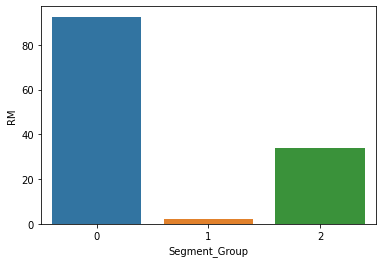

In [208]:
ax = sns.barplot(x="Segment_Group", y="RM", data=recent)

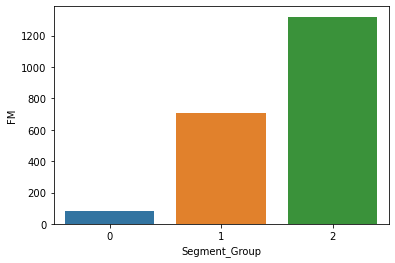

In [209]:
ax = sns.barplot(x="Segment_Group", y="FM", data=freq)

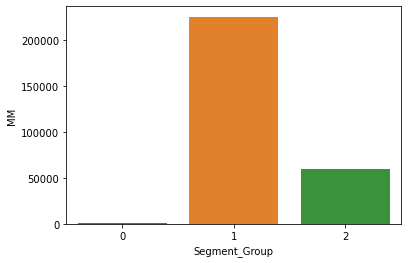

In [211]:
ax = sns.barplot(x="Segment_Group", y="MM", data=monet)